In [2]:
include("ProyectoFinal.jl")

Energia_3 (generic function with 1 method)

In [ ]:
#pygui(true)

## Sistema Sol - Tierra - Luna

Para el sistema de 3 cuerpos formado por el Sol, la Tierra y la Luna, consideramos una posición inicial colineal, con las distancias equivalentes a las distancias astronómicas reportadas.

Usamos también datos concernientes a las masas.

In [3]:
MasaSol = 1.
#MasaTierra = 0.0003015
#MasaLuna = 0.00000037
MasaTierra = 3.3e-5
MasaLuna = 2.7e-7

Distancia_TierraSol = 1.
Distancia_TierraLuna = 0.002577181
Distancia_LunaSol_inicial= Distancia_TierraSol + Distancia_TierraLuna

VelocidadTraslacional_TierraSol = 1.
VelocidadTraslacional_TierraLuna = 0.002
VelocidadLuna_inicial = VelocidadTraslacional_TierraSol + VelocidadTraslacional_TierraLuna

PosicionInicialSol = [0., 0., 0.]
PosicionInicialTierra = [Distancia_TierraSol, 0., 0.]
PosicionInicialLuna = [Distancia_LunaSol_inicial, 0., 0.]

3-element Array{Float64,1}:
 1.00258
 0.0    
 0.0    

In [4]:
function iniciar(masa, posiciones, velocidades)
    condiciones = [masa, posiciones[1], posiciones[2], posiciones[3], velocidades[1], velocidades[2], velocidades[3]]
    return condiciones
end

iniciar (generic function with 1 method)

In [5]:
#Condiciones Iniciales

#CondicionesSol    = [MasaSol,     0.,                  0.,   0., 0.,                                 0.2, 0. ]
CondicionesSol = iniciar(MasaSol, PosicionInicialSol, [0.,0.,0.,])
CondicionesTierra = iniciar(MasaTierra, PosicionInicialTierra, [0., VelocidadTraslacional_TierraSol, 0.])
CondicionesLuna   = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadLuna_inicial, 0.])

#Agrupamos Todo

CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]

3-element Array{Array{Float64,1},1}:
 [1.0,0.0,0.0,0.0,0.0,0.0,0.0]             
 [3.3e-5,1.0,0.0,0.0,0.0,1.0,0.0]          
 [2.7e-7,1.002577181,0.0,0.0,0.0,1.002,0.0]

In [6]:
t, Sol, Tierra, Luna = Integrador3(CondicionesIniciales, 100.);

In [ ]:
function trayectoria(Cuerpo1, Cuerpo2, Cuerpo3, nombre="algo.png")
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]
    
    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    scatter3D(Px1, Py1, Pz1, ",", marker=".", markersize=0.3, color = "red", label="Sol")
    scatter3D(Px2, Py2, Pz2, ",",  marker=".", markersize=0.3, color = "blue", label="Tierra")
    scatter3D(Px3, Py3, Pz3,  linestyle=",",  marker=".", markersize=0.3, color = "purple", label="Luna")
    show()
#    legend()   
    #savefig(nombre)
    
end


In [55]:
using Colors
par = [3.0:-0.05:-2.0]
paleta_luna = colormap("RdBu", length(par))

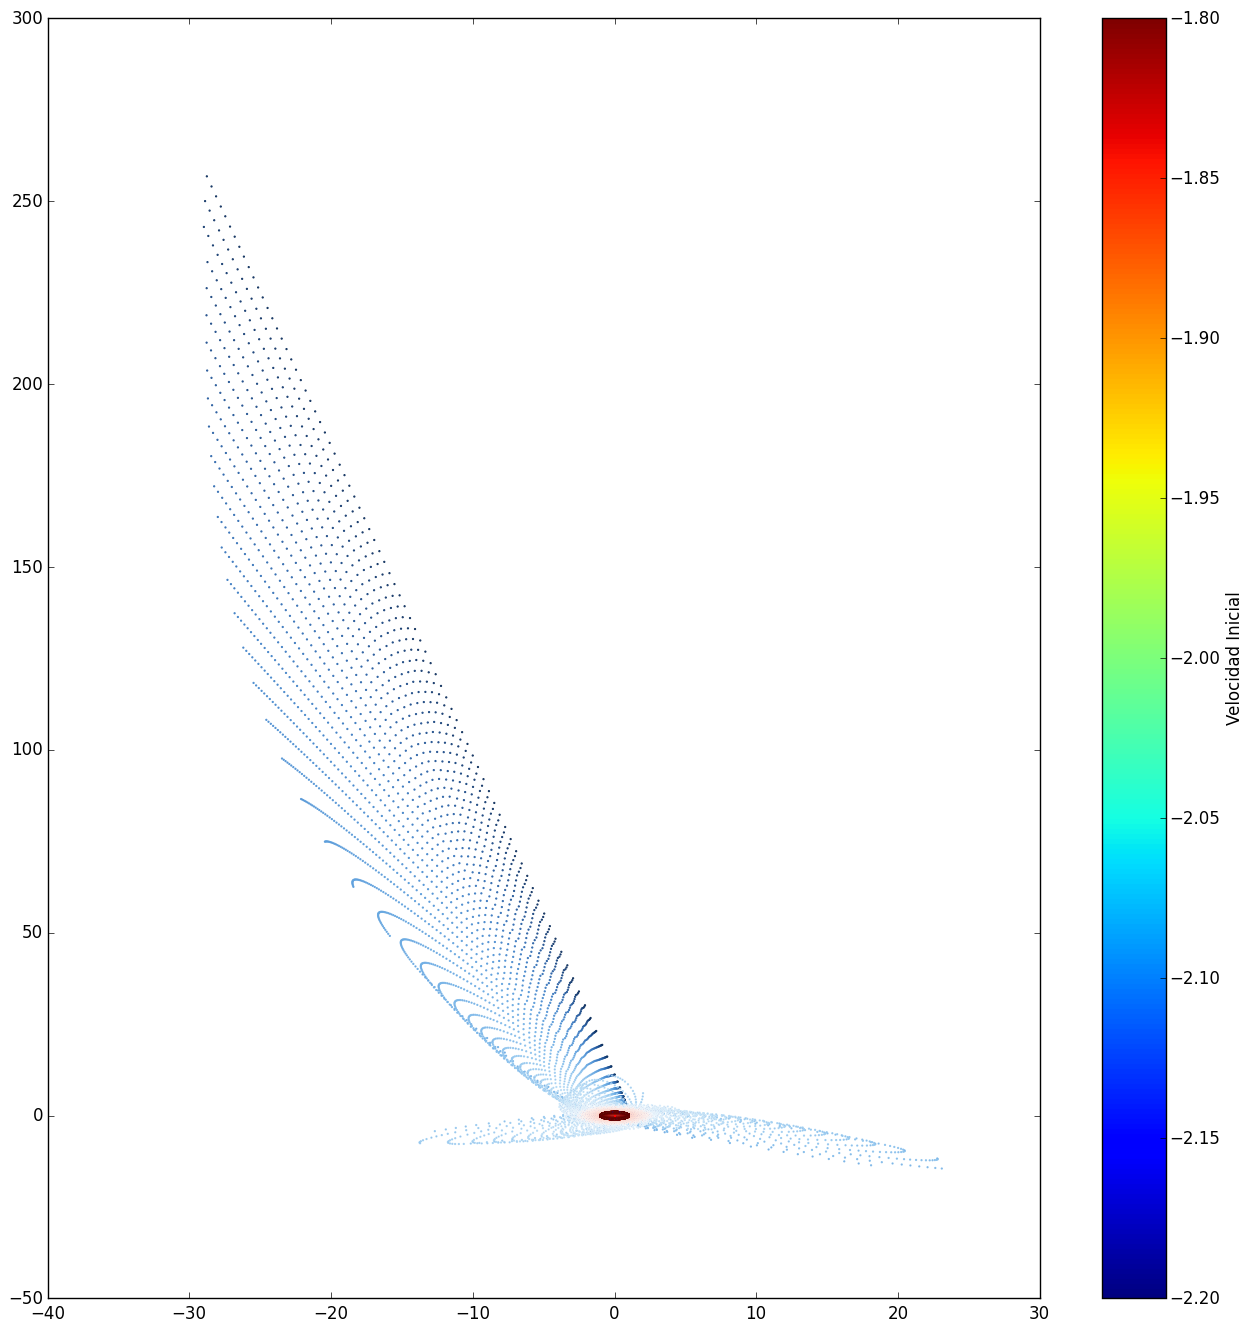

In [57]:
using Colors
par = [3.0:-0.05:-2.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 100.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

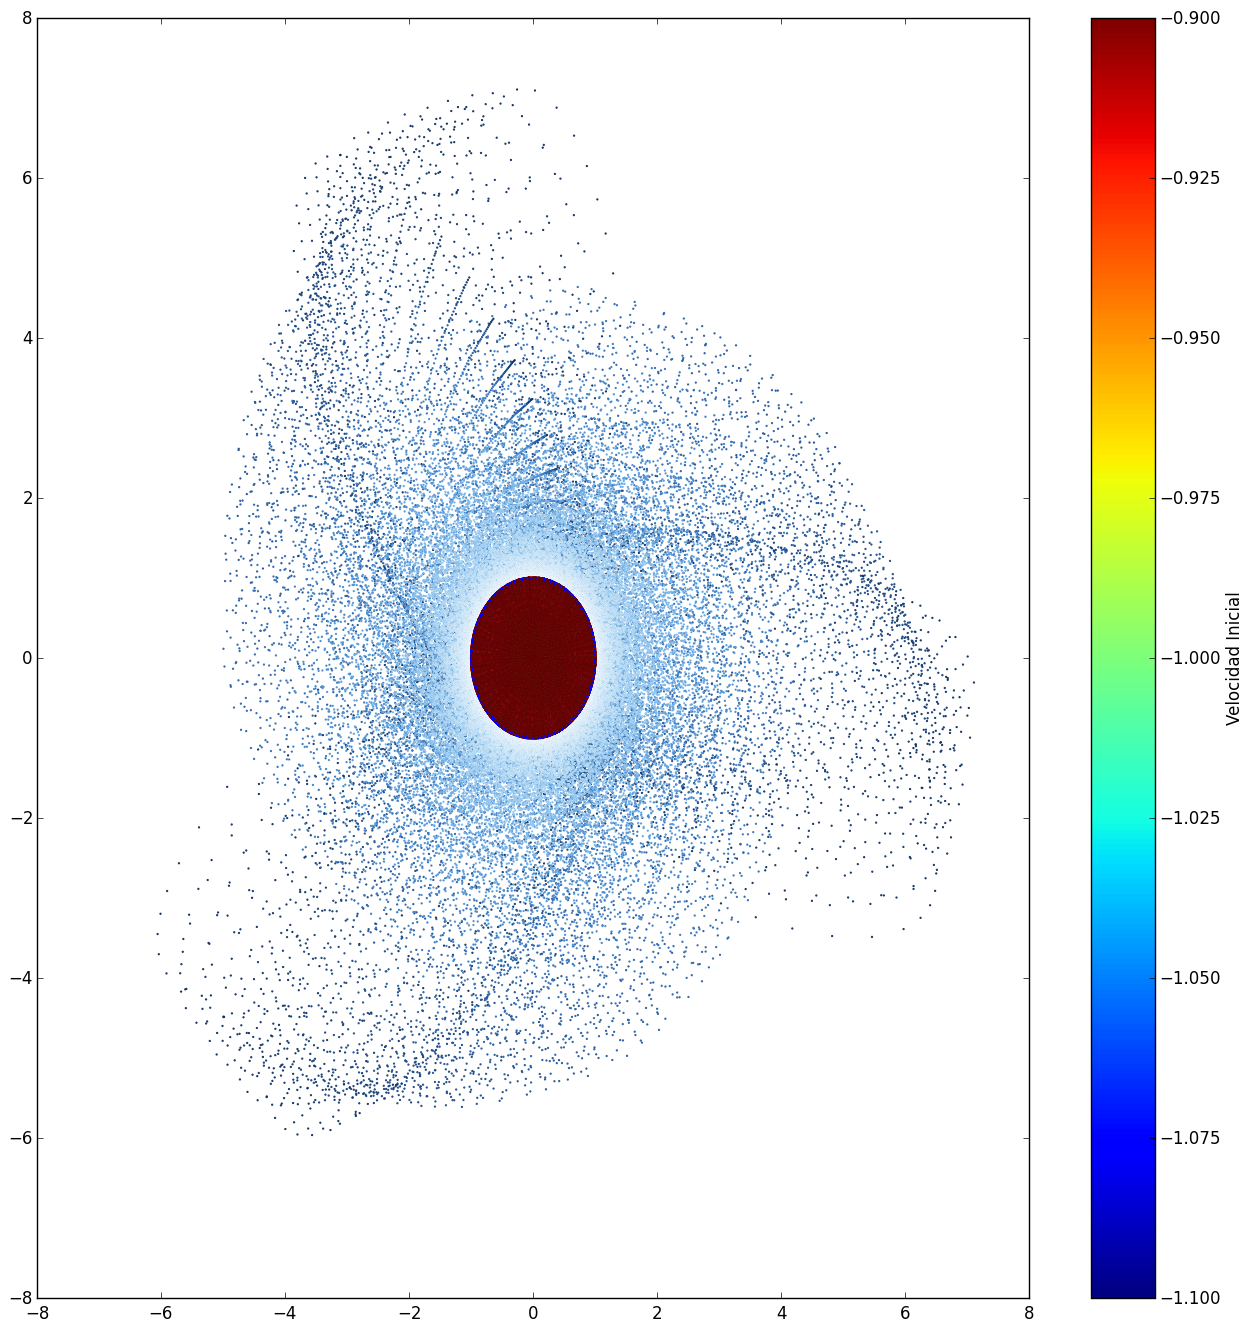

In [58]:
par = [1.0:-0.01:-1.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 300.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

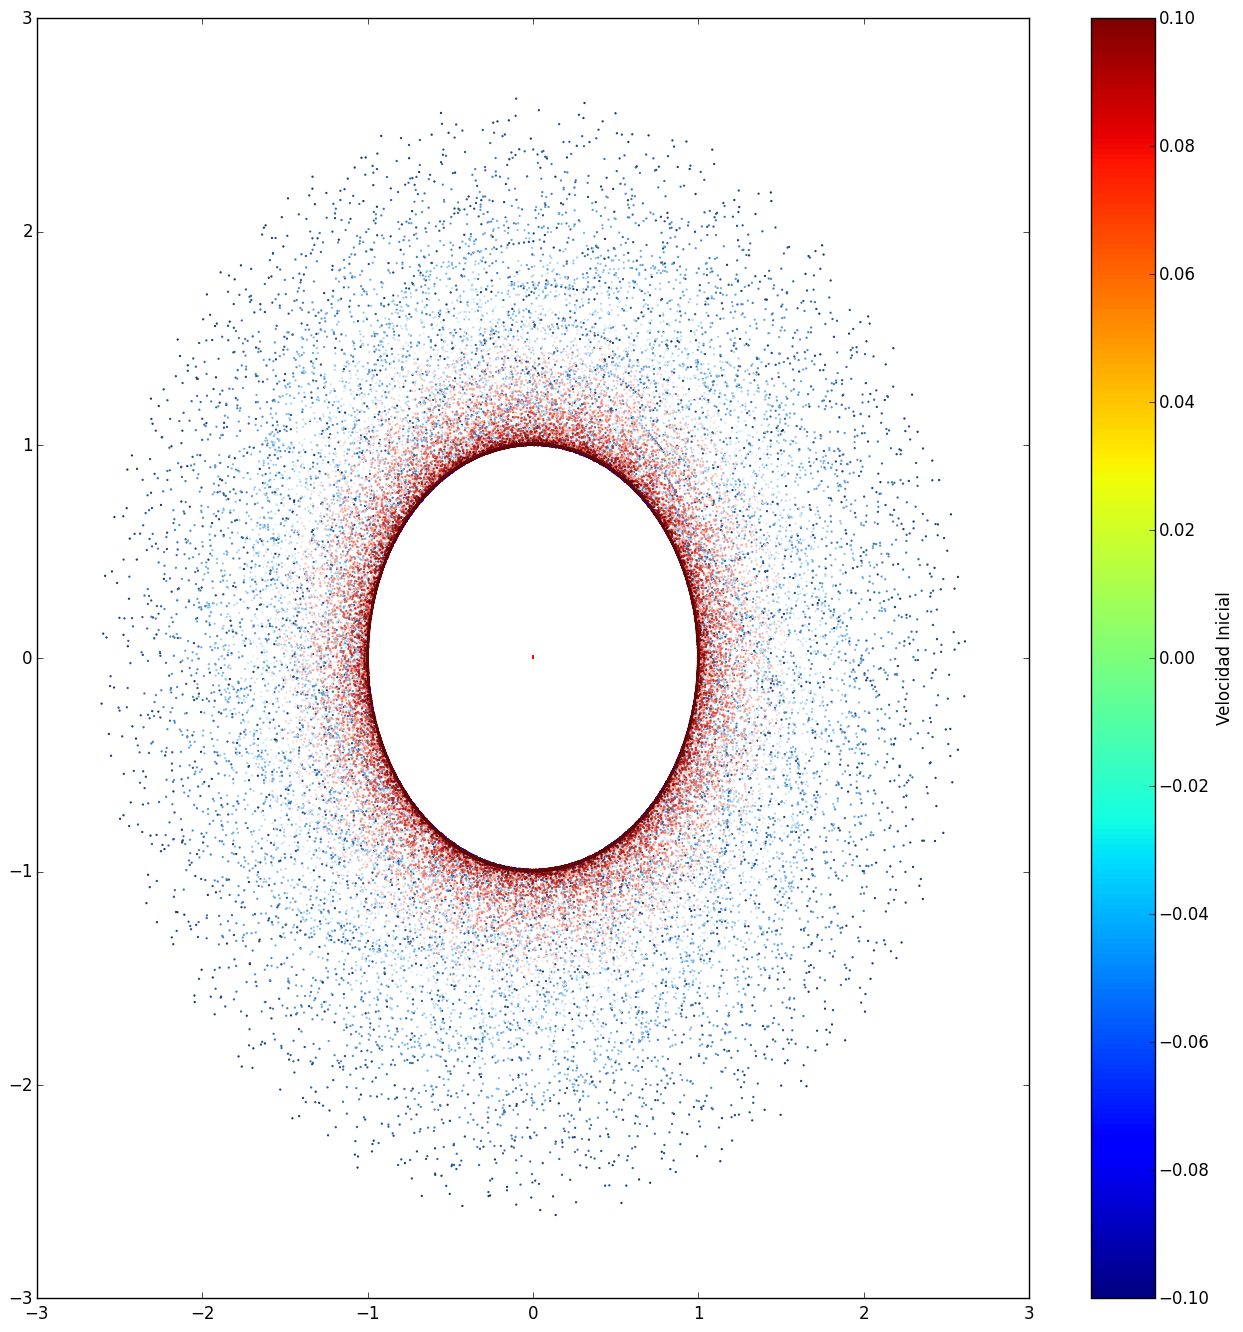

In [59]:
par = [0.5:-0.01:0.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 300.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

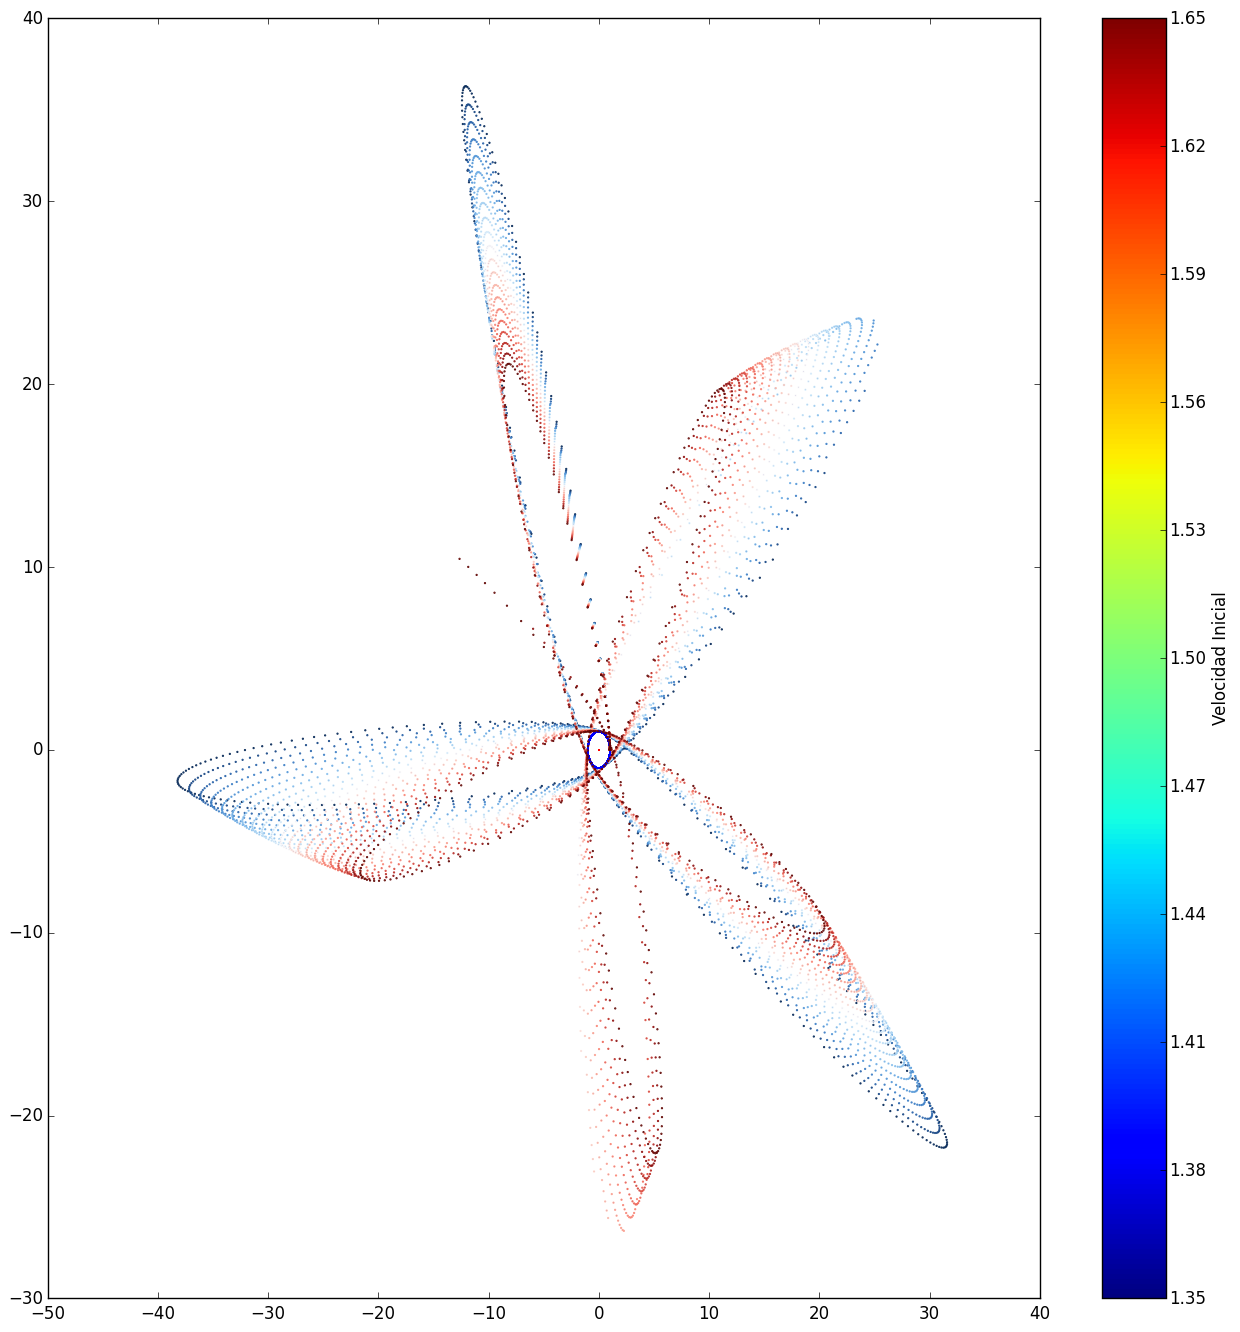

In [60]:
par = [1.7:-0.01:1.5]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 300.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

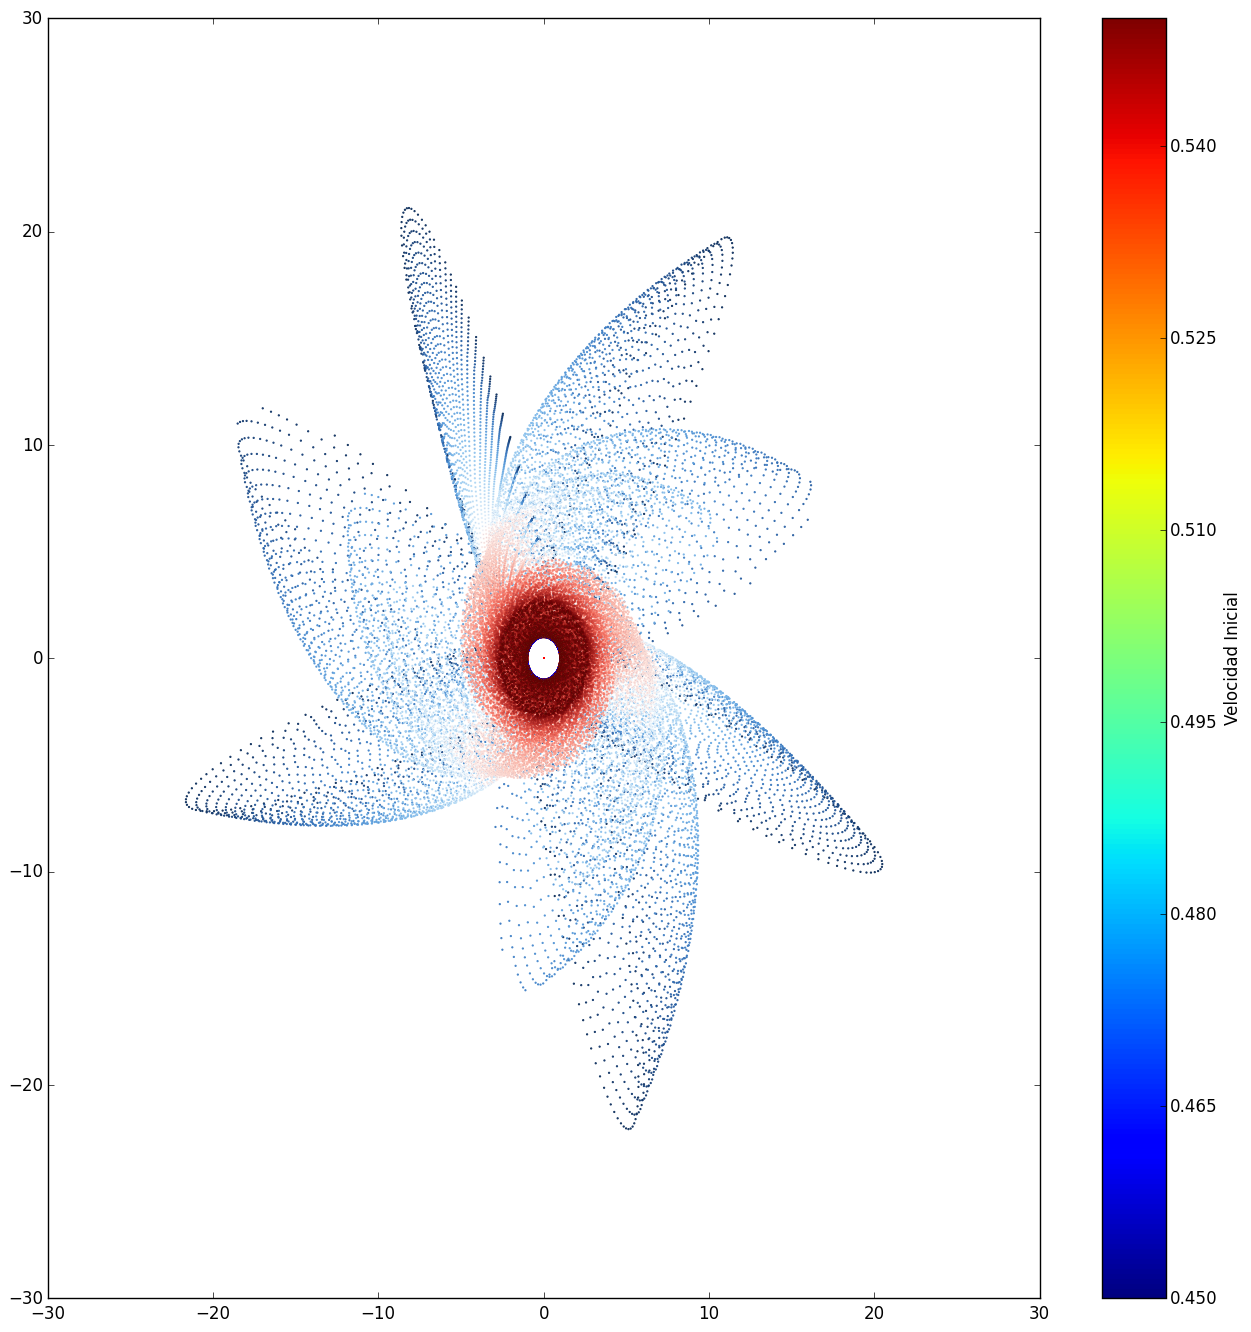

In [74]:
par = [1.5:-0.01:0.5]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 300.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    e=Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

In [ ]:
anima3C(Sol, Tierra, Luna, "Sistema2",2)

In [ ]:
muestra_animacion("Sistema2")